In [2]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [3]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv'

## 1. Read data

In [4]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_train = real_data
real_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Female,21,1.63,60.00,yes,yes,3.000000,3.000000,Always,yes,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
1,Female,21,1.75,133.62,yes,yes,3.000000,3.000000,Sometimes,no,2.887659,no,1.480919,0.779641,Sometimes,Public_Transportation,Obesity_Type_III
2,Female,23,1.66,82.60,yes,yes,1.203754,1.355354,Sometimes,no,2.765593,no,0.128342,1.659476,Sometimes,Public_Transportation,Obesity_Type_I
3,Female,22,1.59,44.24,no,no,3.000000,1.696080,Frequently,no,2.550307,no,1.098862,0.000000,no,Public_Transportation,Insufficient_Weight
4,Male,26,1.81,106.04,yes,yes,3.000000,3.000000,Sometimes,no,2.858171,no,1.813318,0.680215,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Male,32,1.75,120.10,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile,Obesity_Type_II
1684,Male,23,1.72,81.67,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation,Overweight_Level_II
1685,Female,23,1.65,80.00,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation,Overweight_Level_II
1686,Female,23,1.63,84.50,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation,Obesity_Type_I


In [5]:
real_data.dtypes

Gender                            category
Age                                  int64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
Obesity_level                     category
dtype: object

### 1.1. Create metada

In [6]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [7]:
tables = dict()
tables['data'] = real_data
tables

{'data':       Gender  Age  Height  Weight family_history_with_overweight FAVC  \
 0     Female   21    1.63   60.00                            yes  yes   
 1     Female   21    1.75  133.62                            yes  yes   
 2     Female   23    1.66   82.60                            yes  yes   
 3     Female   22    1.59   44.24                             no   no   
 4       Male   26    1.81  106.04                            yes  yes   
 ...      ...  ...     ...     ...                            ...  ...   
 1683    Male   32    1.75  120.10                            yes  yes   
 1684    Male   23    1.72   81.67                            yes  yes   
 1685  Female   23    1.65   80.00                            yes  yes   
 1686  Female   23    1.63   84.50                            yes  yes   
 1687    Male   20    1.82   85.00                            yes  yes   
 
           FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
 0     3.000000  3.00

## 2. Train the model and generate data

In [8]:
sdv = SDV()
sdv.fit(metadata, tables)

In [9]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Male,28,1.760840,123.433349,yes,yes,3.205596,2.903116,Sometimes,no,1.904073,no,0.448286,0.313930,Sometimes,Public_Transportation,Obesity_Type_II
1,Male,12,1.694515,40.753487,yes,yes,2.239509,2.653353,Sometimes,no,2.042313,no,0.645014,0.601065,no,Public_Transportation,Overweight_Level_I
2,Female,18,1.634625,94.781689,yes,yes,3.094983,3.169795,Sometimes,no,2.692556,no,1.037283,0.856946,Sometimes,Public_Transportation,Overweight_Level_I
3,Male,21,1.818554,136.997129,no,yes,2.095592,3.177185,Sometimes,no,2.276122,no,1.221715,0.845391,Sometimes,Public_Transportation,Obesity_Type_I
4,Female,38,1.647456,84.018754,yes,yes,2.726584,1.015046,Sometimes,no,0.278486,no,1.055731,0.248985,no,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Male,31,1.483192,76.020805,yes,yes,2.602491,3.355760,Sometimes,no,2.240679,no,1.903530,0.172436,Sometimes,Public_Transportation,Overweight_Level_II
1684,Female,21,1.665494,45.278110,yes,yes,2.534703,3.542202,Sometimes,no,1.935781,no,-0.184959,0.306923,Sometimes,Public_Transportation,Normal_Weight
1685,Male,32,1.688156,103.845990,yes,yes,2.682470,2.334944,Sometimes,no,3.093748,no,1.181994,0.758202,Sometimes,Public_Transportation,Obesity_Type_I
1686,Male,22,1.773781,115.654265,yes,yes,3.076754,3.583925,Sometimes,no,2.792898,no,1.703388,1.141771,Sometimes,Public_Transportation,Obesity_Type_II


In [10]:
float_2 = ['Height','Weight']
for col in float_2 :
    synthetic_data[col] = abs(np.round(synthetic_data[col],2))
synthetic_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,Male,28,1.76,123.43,yes,yes,3.205596,2.903116,Sometimes,no,1.904073,no,0.448286,0.313930,Sometimes,Public_Transportation,Obesity_Type_II
1,Male,12,1.69,40.75,yes,yes,2.239509,2.653353,Sometimes,no,2.042313,no,0.645014,0.601065,no,Public_Transportation,Overweight_Level_I
2,Female,18,1.63,94.78,yes,yes,3.094983,3.169795,Sometimes,no,2.692556,no,1.037283,0.856946,Sometimes,Public_Transportation,Overweight_Level_I
3,Male,21,1.82,137.00,no,yes,2.095592,3.177185,Sometimes,no,2.276122,no,1.221715,0.845391,Sometimes,Public_Transportation,Obesity_Type_I
4,Female,38,1.65,84.02,yes,yes,2.726584,1.015046,Sometimes,no,0.278486,no,1.055731,0.248985,no,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,Male,31,1.48,76.02,yes,yes,2.602491,3.355760,Sometimes,no,2.240679,no,1.903530,0.172436,Sometimes,Public_Transportation,Overweight_Level_II
1684,Female,21,1.67,45.28,yes,yes,2.534703,3.542202,Sometimes,no,1.935781,no,-0.184959,0.306923,Sometimes,Public_Transportation,Normal_Weight
1685,Male,32,1.69,103.85,yes,yes,2.682470,2.334944,Sometimes,no,3.093748,no,1.181994,0.758202,Sometimes,Public_Transportation,Obesity_Type_I
1686,Male,22,1.77,115.65,yes,yes,3.076754,3.583925,Sometimes,no,2.792898,no,1.703388,1.141771,Sometimes,Public_Transportation,Obesity_Type_II


In [11]:
real_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.449052,1.701564,86.598235,2.421880,2.685886,2.006181,1.004208,0.644357
std,6.486209,0.093323,26.099420,0.537088,0.782557,0.609598,0.839721,0.602679
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,2.658599,1.591831,0.132315,0.000000
50%,23.000000,1.700000,82.975000,2.392422,3.000000,2.000000,1.000000,0.609316
75%,26.000000,1.770000,106.737500,3.000000,3.000000,2.458165,1.646370,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
synthetic_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.634479,1.702974,86.785575,2.429929,2.693776,2.019376,1.018914,0.641046
std,6.477606,0.093264,26.375983,0.538235,0.791913,0.610816,0.847574,0.595911
min,5.000000,1.410000,11.400000,0.550067,-0.118224,-0.117678,-1.883868,-1.378551
25%,20.000000,1.640000,69.422500,2.065871,2.161602,1.605414,0.448407,0.232531
50%,25.000000,1.700000,86.170000,2.425507,2.700749,2.021570,1.006281,0.633267
75%,29.000000,1.770000,104.650000,2.788614,3.220364,2.462628,1.571726,1.025801
max,45.000000,2.010000,173.060000,4.212080,5.354932,3.815218,4.323205,2.626267


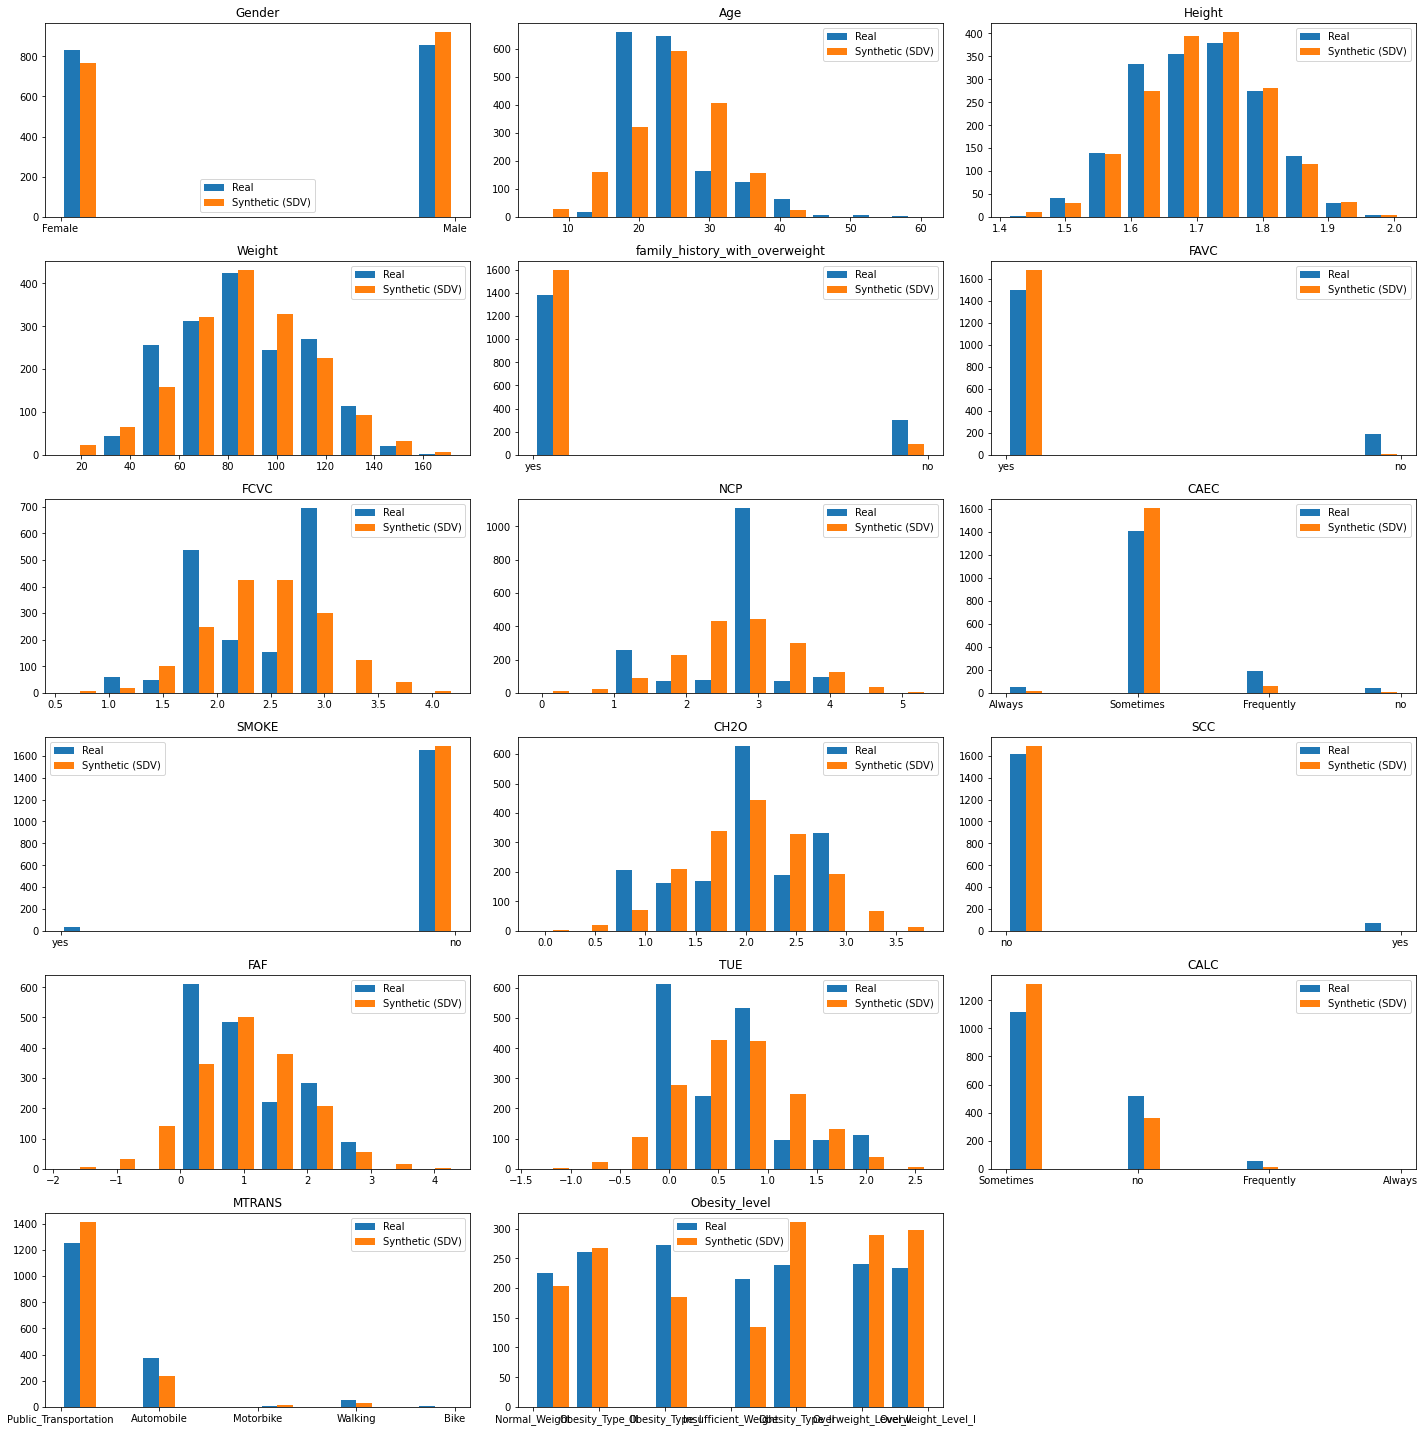

In [13]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (SDV)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[5,2])
fig.tight_layout(pad=1.1)

In [14]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)